In [4]:
import  pandas as pd
# 数据第一列是索引   指定索引
store = pd.read_csv('store_rev.csv',index_col=0)
# 查看数据信息
store.info()
# 查看有没有控制
store.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 7 columns):
revenue     985 non-null float64
reach       985 non-null int64
local_tv    929 non-null float64
online      985 non-null int64
instore     985 non-null int64
person      985 non-null int64
event       985 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 61.6+ KB


revenue      0
reach        0
local_tv    56
online       0
instore      0
person       0
event        0
dtype: int64

In [8]:
# 有五十六个null
store.describe()
# store.head()

,revenue,reach,local_tv,online,instore,person
count,985.000000,985.000000,929.000000,985.000000,985.000000,985.000000
mean,38357.355025,3.395939,31324.061109,1596.527919,3350.962437,11.053807
std,11675.603883,1.011913,3970.934733,496.131586,976.546381,3.041740
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30223.600000,3.000000,28733.830000,1253.000000,2690.000000,9.000000
50%,38159.110000,3.000000,31104.520000,1607.000000,3351.000000,11.000000
75%,45826.520000,4.000000,33972.410000,1921.000000,4011.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [11]:
# 了解event的具体指
store.event.unique()
# 对应的销售额是怎样的
store.groupby(['event'])['local_tv'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,376.0,31424.590186,3951.049566,21252.35,28746.9725,31336.570,33839.0200,42162.64
holiday,96.0,30860.524896,4448.719364,21792.84,27769.6000,30564.705,33595.5975,41047.01
non_event,182.0,31415.197527,3952.155383,20000.00,29222.5875,31238.235,34386.0825,42069.84
special,275.0,31288.110982,3842.412128,21428.20,28668.7100,30921.790,34105.6250,43676.90


In [10]:
# 查看对应的本地广告投入怎么样
store.groupby(['event'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,398.0,38277.664497,11879.097324,7146.99,30472.1525,37864.155,46333.5600,79342.07
holiday,103.0,37791.890583,11942.369136,5000.00,29644.5250,38432.780,46036.1300,73377.15
non_event,192.0,37903.081562,11186.436740,6874.43,29852.3775,37937.175,44611.6375,69429.39
special,292.0,38964.136438,11648.616882,10207.96,30325.8125,39197.870,45897.0400,71757.50


In [13]:
# 类别变量转化成哑变量
store = pd.get_dummies(store)

store.info()

# 相关性分析  所有变量任意变量相关分析
#local_tv,person,instore是比较好的指标，与revenue相关度高
store.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 10 columns):
revenue             985 non-null float64
reach               985 non-null int64
local_tv            929 non-null float64
online              985 non-null int64
instore             985 non-null int64
person              985 non-null int64
event_cobranding    985 non-null uint8
event_holiday       985 non-null uint8
event_non_event     985 non-null uint8
event_special       985 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 57.7 KB


,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
revenue,1.000000,-0.155314,0.602114,0.171227,0.311739,0.559208,-0.005623,-0.016559,-0.019155,0.033752
reach,-0.155314,1.000000,-0.034039,-0.025141,0.035635,0.061417,0.043809,0.020398,-0.043128,-0.023330
local_tv,0.602114,-0.034039,1.000000,0.006775,-0.046825,0.048664,0.020886,-0.039650,0.011335,-0.005874
online,0.171227,-0.025141,0.006775,1.000000,-0.026399,0.036662,-0.024646,-0.018596,-0.020587,0.056799
instore,0.311739,0.035635,-0.046825,-0.026399,1.000000,-0.007482,-0.057725,0.045963,0.015495,0.017788
person,0.559208,0.061417,0.048664,0.036662,-0.007482,1.000000,0.002439,-0.025692,-0.025568,0.036771
event_cobranding,-0.005623,0.043809,0.020886,-0.024646,-0.057725,0.002439,1.000000,-0.281389,-0.405169,-0.534499
event_holiday,-0.016559,0.020398,-0.039650,-0.018596,0.045963,-0.025692,-0.281389,1.000000,-0.168151,-0.221824
event_non_event,-0.019155,-0.043128,0.011335,-0.020587,0.015495,-0.025568,-0.405169,-0.168151,1.000000,-0.319403
event_special,0.033752,-0.023330,-0.005874,0.056799,0.017788,0.036771,-0.534499,-0.221824,-0.319403,1.000000


In [14]:
store.head(10)

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
845,45860.28,2,31694.91,2115,3296,8,0,0,1,0
483,63588.23,2,35040.17,1826,2501,14,0,0,0,1
513,23272.69,4,30992.82,1851,2524,6,0,0,0,1
599,45911.23,2,29417.78,2437,3049,12,0,0,0,1
120,36644.23,2,35611.11,1122,1142,13,1,0,0,0
867,36172.81,4,22372.59,2001,1881,17,1,0,0,0
847,43797.03,3,31443.74,1667,1846,15,1,0,0,0
950,41629.80,4,35775.75,1155,2715,12,0,0,0,1
942,21303.48,2,24888.31,1853,3677,4,0,0,1,0
550,20746.15,4,26623.48,1497,3075,9,0,1,0,0


In [16]:
nding默认升序，False为降序排列
#看到前3个相关变量为local_tv,person,instore
store.corr()[['revenue']].sort_values('revenue',ascending=False)

,revenue
revenue,1.000000
local_tv,0.602114
person,0.559208
instore,0.311739
online,0.171227
event_special,0.033752
event_cobranding,-0.005623
event_holiday,-0.016559
event_non_event,-0.019155
reach,-0.155314


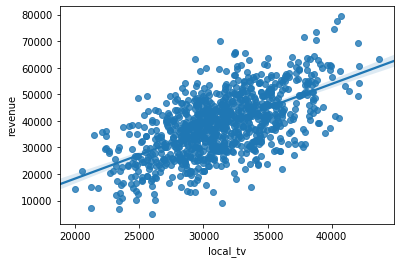

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#线性关系可视化
#斜率与相关系数有关
sns.regplot('local_tv','revenue',store)

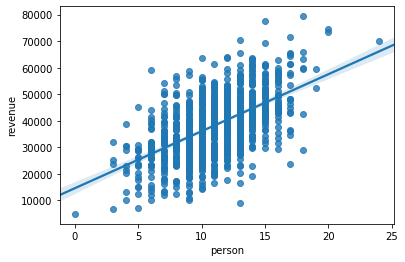

In [18]:
#线性关系可视化
sns.regplot('person','revenue',store)

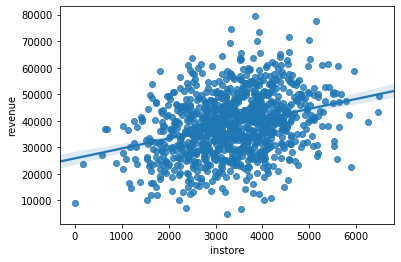

In [19]:
sns.regplot('instore','revenue',store)

In [28]:
# 线性回归的分析
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#设定自变量和因变量
y=store['revenue']
#第一次三个 
x=store[['local_tv','person','instore']
#第二次四个 
x=store[['local_tv','person','instore','online']]
model.fit(x,y)
# 有缺失值   处理缺失值

SyntaxError: invalid syntax (<ipython-input-28-ad91b8d0d981>, line 9)

In [25]:
store = store.fillna(0)
store = store.fillna(store.local_tv.mean())
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 10 columns):
revenue             985 non-null float64
reach               985 non-null int64
local_tv            985 non-null float64
online              985 non-null int64
instore             985 non-null int64
person              985 non-null int64
event_cobranding    985 non-null uint8
event_holiday       985 non-null uint8
event_non_event     985 non-null uint8
event_special       985 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 57.7 KB


In [27]:
#自变量系数
model.coef_
#模型的截距
model.intercept_
#模型的评估,x为'local_tv','person','instore'
score=model.score(x,y)#x和y打分
predictions=model.predict(x)#计算y预测值
error=predictions-y#计算误差

rmse=(error**2).mean()**.5#计算rmse
mae=abs(error).mean()#计算mae

print(rmse)
print(mae)

AttributeError: 'LinearRegression' object has no attribute 'coef_'